# Load the dataset

In [165]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [166]:
import urllib.request
urllib.request.urlretrieve('ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt', 'stations.txt')

('stations.txt', <email.message.Message at 0x159481a3548>)

In [167]:
open('stations.txt', 'r').readlines()[:10]

['ACW00011604  17.1167  -61.7833   10.1    ST JOHNS COOLIDGE FLD                       \n',
 'ACW00011647  17.1333  -61.7833   19.2    ST JOHNS                                    \n',
 'AE000041196  25.3330   55.5170   34.0    SHARJAH INTER. AIRP            GSN     41196\n',
 'AEM00041194  25.2550   55.3640   10.4    DUBAI INTL                             41194\n',
 'AEM00041217  24.4330   54.6510   26.8    ABU DHABI INTL                         41217\n',
 'AEM00041218  24.2620   55.6090  264.9    AL AIN INTL                            41218\n',
 'AF000040930  35.3170   69.0170 3366.0    NORTH-SALANG                   GSN     40930\n',
 'AFM00040938  34.2100   62.2280  977.2    HERAT                                  40938\n',
 'AFM00040948  34.5660   69.2120 1791.3    KABUL INTL                             40948\n',
 'AFM00040990  31.5000   65.8500 1010.0    KANDAHAR AIRPORT                       40990\n']

In [168]:
stations = {}

for line in open('stations.txt', 'r'):
    if 'GSN' in line:
        fields = line.split()
        stations[fields[0]] = ' '.join(fields[4:])
        
print(stations)

{'AE000041196': 'SHARJAH INTER. AIRP GSN 41196', 'AF000040930': 'NORTH-SALANG GSN 40930', 'AG000060390': 'ALGER-DAR EL BEIDA GSN 60390', 'AG000060590': 'EL-GOLEA GSN 60590', 'AG000060611': 'IN-AMENAS GSN 60611', 'AG000060680': 'TAMANRASSET GSN 60680', 'AJ000037989': 'ASTARA GSN 37989', 'ALM00013615': 'TIRANA RINAS GSN 13615', 'AM000037781': 'ARAGAC VISOKOGORNAYA GSN 37781', 'AO000066160': 'LUANDA GSN 66160', 'AO000066270': 'WAKU KUNGU (CELA) GSN 66270', 'AO000066390': 'LUBANGO (SA DA BAND GSN 66390', 'AO000066410': 'MENONGUE (SERPA PIN GSN 66410', 'AO000066422': 'MOCAMEDES GSN 66422', 'AO000066447': 'MAVINGA GSN 66447', 'AQW00061705': 'AS PAGO PAGO WSO AP GSN 91765', 'AR000087007': 'LA QUIACA OBSERVATO GSN 87007', 'AR000087065': 'RIVADAVIA GSN 87065', 'AR000087078': 'LAS LOMITAS GSN 87078', 'AR000087155': 'RESISTENCIA AERO GSN 87155', 'AR000087217': 'LA RIOJA AERO. GSN 87217', 'AR000087257': 'CERES AERO GSN 87257', 'AR000087270': 'RECONQUISTA AERO GSN 87270', 'AR000087344': 'CORDOBA AE

In [169]:
len(stations)

994

In [170]:
def findStation(s):
    found = {code: name for code, name in stations.items() if s in name}
    print(found)

In [171]:
findStation('LIHUE')

{'USW00022536': 'HI LIHUE WSO AP 1020.1 GSN 91165'}


In [172]:
findStation('SAN DIEGO')

{'USW00023188': 'CA SAN DIEGO LINDBERGH FLD GSN 72290'}


In [173]:
findStation('MINNEAPOLIS')

{'USW00014922': 'MN MINNEAPOLIS/ST PAUL AP GSN HCN 72658'}


In [174]:
findStation('IRKUTSK')

{'RSM00030710': 'IRKUTSK GSN 30710'}


In [175]:
findStation('KATHMANDU')

{'NP000444540': 'KATHMANDU AIRPORT GSN 44454'}


In [176]:
dataStations = ['USW00022536', 'USW00023188', 'USW00014922', 'NP000444540']

# Temperature Analysis
## Learning Objective
* Parsing a fixed-field text file using np.genfromtxt
* Using ranges of Numpy datetime objects

In [177]:
open('NP000444540.dly', 'r').readlines()[10:20]

['NP000444540197106TMAX  271  G  264  G  282  G  274  G  272  G  280  G  288  G  253  G  264  G  263  G  256  G  270  G  228  G  211  G  210  G  236  G  264  G  271  G  278  G  276  G  268  G  278  G  270  G  248  G  257  G  272  G  266  G  253  G  269  G  266  G-9999   \n',
 'NP000444540197106TMIN  192  G  179  G  185  G  189  G  192  G  196  G  198  G  211  G  210  G  207  G  193  G  190  G  191  G  187  G  188  G  183  G  190  G  198  G  208  G  199  G  186  G  203  G  205  G  197  G  199  G  201  G  200  G  201  G  198  G  202  G-9999   \n',
 'NP000444540197107TMAX  262  G  269  G  270  G  280  G  260  G  256  G  267  G  271  G  260  G  230  G  260  G  270  G  260  G  290  G  296  G  267  G  260  G  276  G  282  G  274  G  274  G  268  G  282  G  266  G  288  G  275  G  256  G  274  G  269  G  260  G  259  G\n',
 'NP000444540197107TMIN  202  G  200  G  199  G  199  G  206  G  202  G  196  G  200  G  210  G  204  G  193  G  200  G  196  G  190  G  202  G  198  G  207  G  205  G  202

In [178]:
open('readme.txt', 'r').readlines()[98:121]

['------------------------------\n',
 'Variable   Columns   Type\n',
 '------------------------------\n',
 'ID            1-11   Character\n',
 'YEAR         12-15   Integer\n',
 'MONTH        16-17   Integer\n',
 'ELEMENT      18-21   Character\n',
 'VALUE1       22-26   Integer\n',
 'MFLAG1       27-27   Character\n',
 'QFLAG1       28-28   Character\n',
 'SFLAG1       29-29   Character\n',
 'VALUE2       30-34   Integer\n',
 'MFLAG2       35-35   Character\n',
 'QFLAG2       36-36   Character\n',
 'SFLAG2       37-37   Character\n',
 '  .           .          .\n',
 '  .           .          .\n',
 '  .           .          .\n',
 'VALUE31    262-266   Integer\n',
 'MFLAG31    267-267   Character\n',
 'QFLAG31    268-268   Character\n',
 'SFLAG31    269-269   Character\n',
 '------------------------------\n']

In [179]:
def parseFile(filename):
    return np.genfromtxt(filename,
                         delimiter = dly_delimiter,
                         usecols = dly_usecols,
                         dtype = dly_dtype,
                         names = dly_names)

In [180]:
dly_delimiter = [11,4,2,4] + [5,1,1,1]*31
dly_usecols = [1,2,3] + [4*i for i in range(1, 32)]
dly_dtype = [np.int32, np.int32, (np.str_,4)] + [np.int32]*31
dly_names = ['year', 'month', 'obs'] + [str(day) for day in range(1, 31+1)]

In [181]:
kathmandu = parseFile('NP000444540.dly')

In [182]:
kathmandu

array([(1971,  1, 'TMAX',   173,   178,   183,   173,   172, 172, 190, 210, 198,   194, 202, 191, 172, 178, 192, 186, 166,   168, 170,   164, 144,   150,   149,   162,   132,   182,   168,   172,   162,   161,   165),
       (1971,  1, 'TMIN',    38,    61,    29,    53,    49,  34,  10,   8,   5,     8,  12,  37,  13,  13,   8,  55,  20,     5,  -2,     0,   3,    46,    23,   -10,    -1,    48,    21,    31,    20,     0,    -5),
       (1971,  2, 'TMAX',   170,   189,   184,   195,   180, 158, 169, 185, 176,   180, 182, 186, 182, 169, 215, 229, 214,   211, 216,   185, 209,   213,   214,   209,   208,   199,   193,   143, -9999, -9999, -9999),
       ...,
       (2019, 11, 'TMIN',   114, -9999, -9999, -9999, -9999, 112, 120, 118, 115, -9999, 110, 106, 120, 106, 107, 112, 118, -9999, 115, -9999, 120, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999),
       (2019, 11, 'PRCP', -9999, -9999, -9999,     0, -9999,   0,   0,   0,   0, -9999,   0,   0,   0,   0,   0,   0

In [183]:
def unroll(record):
    startdate = np.datetime64('{}-{:02}'.format(record['year'], record['month']))
    dates = np.arange(startdate, startdate + np.timedelta64(1, 'M'), np.timedelta64(1,'D'))
    
    rows = [(date,record[str(i+1)]/10) for i,date in enumerate(dates)]
    
    return np.array(rows, dtype=[('date', 'M8[D]'), ('value', 'd')])

In [184]:
for row in kathmandu:
    if row['year'] == 2010:
        print(row)

(2010, 1, 'TMAX', 195, -9999, -9999, 226, 217, -9999, 225, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, 226, -9999, -9999, -9999, -9999, -9999, -9999, 206, -9999, -9999, -9999, -9999, 226, -9999, -9999)
(2010, 1, 'PRCP', 0, -9999, -9999, 0, 0, -9999, 0, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, 0, -9999, -9999, -9999, -9999, -9999, -9999, 0, -9999, -9999, -9999, -9999, 0, -9999, -9999)
(2010, 1, 'TAVG', 112, 111, 149, 146, 121, 125, 134, 141, 132, 131, 120, 133, 126, 140, 122, 118, 136, 129, 124, 126, 137, 149, 144, 133, 146, 134, 141, 141, 134, 141, 137)
(2010, 2, 'TMAX', -9999, 229, -9999, -9999, 221, 225, 225, 220, -9999, 211, -9999, -9999, 235, 255, -9999, -9999, -9999, 246, 246, -9999, 229, 224, -9999, -9999, 266, 264, -9999, -9999, -9999, -9999, -9999)
(2010, 2, 'PRCP', -9999, 0, -9999, -9999, 0, 0, 0, 0, -9999, 15, 0, -9999, 3, 0, -9999, -9999, -9999, 0, 0, -9999, 0, 0, -9999, -9999, 0, 0, -9999, -9999, -9999, -9999, -9999)
(2010, 2, 'TAVG'

In [185]:
unroll(kathmandu[0])

array([('1971-01-01', 17.3), ('1971-01-02', 17.8), ('1971-01-03', 18.3),
       ('1971-01-04', 17.3), ('1971-01-05', 17.2), ('1971-01-06', 17.2),
       ('1971-01-07', 19. ), ('1971-01-08', 21. ), ('1971-01-09', 19.8),
       ('1971-01-10', 19.4), ('1971-01-11', 20.2), ('1971-01-12', 19.1),
       ('1971-01-13', 17.2), ('1971-01-14', 17.8), ('1971-01-15', 19.2),
       ('1971-01-16', 18.6), ('1971-01-17', 16.6), ('1971-01-18', 16.8),
       ('1971-01-19', 17. ), ('1971-01-20', 16.4), ('1971-01-21', 14.4),
       ('1971-01-22', 15. ), ('1971-01-23', 14.9), ('1971-01-24', 16.2),
       ('1971-01-25', 13.2), ('1971-01-26', 18.2), ('1971-01-27', 16.8),
       ('1971-01-28', 17.2), ('1971-01-29', 16.2), ('1971-01-30', 16.1),
       ('1971-01-31', 16.5)], dtype=[('date', '<M8[D]'), ('value', '<f8')])

In [186]:
def getObs(filename, obs):
    return np.concatenate([unroll(row) for row in parseFile(filename) if row[2] == obs])

In [187]:
getObs('NP000444540.dly', 'TMAX')

array([('1971-01-01',   17.3), ('1971-01-02',   17.8),
       ('1971-01-03',   18.3), ..., ('2019-11-28', -999.9),
       ('2019-11-29', -999.9), ('2019-11-30', -999.9)],
      dtype=[('date', '<M8[D]'), ('value', '<f8')])

# Integrate Missing Data

## Learning Objectives
 * Using Numpy Boolean Mask indexing
 * Interpolating one-dimentional arrays with numpy.interp

In [188]:
kathmandu_tmin = getObs('NP000444540.dly', 'TMIN')
kathmandu_tmax = getObs('NP000444540.dly', 'TMAX')

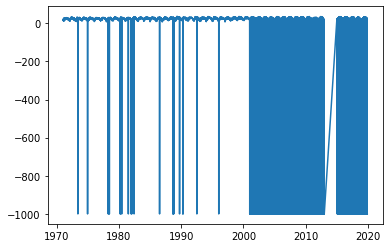

In [189]:
plt.plot(kathmandu_tmax['date'], kathmandu_tmax['value'])

In [190]:
def getObs(filename, obs):
    data = np.concatenate([unroll(row) for row in parseFile(filename) if row[2] == obs])
    data['value'][data['value'] == -999.9] = np.nan
    
    return data

In [191]:
kathmandu_tmin = getObs('NP000444540.dly', 'TMIN')
kathmandu_tmax = getObs('NP000444540.dly', 'TMAX')

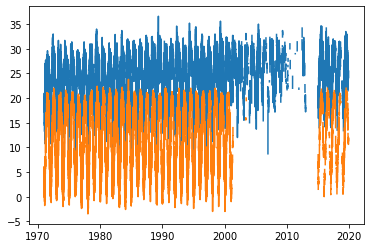

In [192]:
plt.plot(kathmandu_tmax['date'], kathmandu_tmax['value'])
plt.plot(kathmandu_tmin['date'], kathmandu_tmin['value'])

In [193]:
np.mean(kathmandu_tmin['value']), np.mean(kathmandu_tmax['value'])

(nan, nan)

## Interpolation

[0, 8, 0, 12]

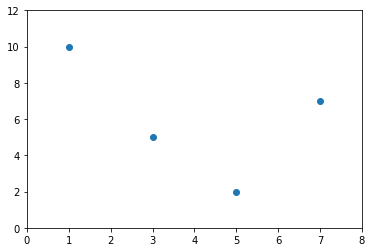

In [194]:
x = np.array([1,3,5,7], 'd')
y = np.array([10,5,2,7], 'd')

plt.plot(x, y, "o")
plt.axis([0,8,0,12])

In [195]:
xs = np.linspace(1,7)

In [196]:
ys = np.interp(xs, x, y)

[0, 8, 0, 12]

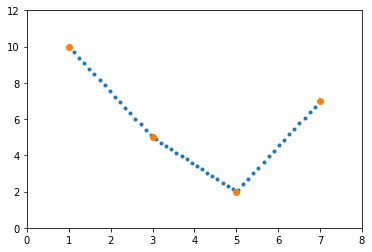

In [197]:
plt.plot(xs, ys, ".")
plt.plot(x, y, "o")
plt.axis([0,8,0,12])

In [198]:
def fillnans(data):
    dates_float = data['date'].astype(np.float64)
    
    nan = np.isnan(data['value'])
    
    data['value'][nan] = np.interp(dates_float[nan], dates_float[~nan],data['value'][~nan])

In [199]:
fillnans(kathmandu_tmin)
fillnans(kathmandu_tmax)

In [200]:
np.mean(kathmandu_tmin['value']), np.mean(kathmandu_tmax['value'])

(11.970047044609013, 25.33980745554042)

# Smoothing data

## Learning Objectives

* Smoothing data with a running mean
* Showing subplot together with matplotlib

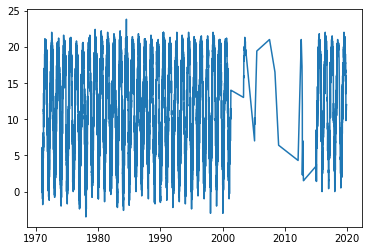

In [201]:
plt.plot(kathmandu_tmin['date'], kathmandu_tmin['value'])

In [202]:
def plotSmoothed(t, win=10):
    smoothed = np.correlate(t['value'], np.ones(win)/win, 'same')
    
    plt.plot(t['date'], smoothed)

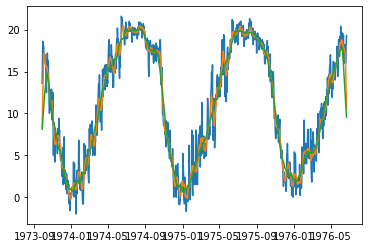

In [203]:
plt.plot(kathmandu_tmin[1000:2000]['date'], kathmandu_tmin[1000:2000]['value'])

plotSmoothed(kathmandu_tmin[1000:2000])
plotSmoothed(kathmandu_tmin[1000:2000], 30)

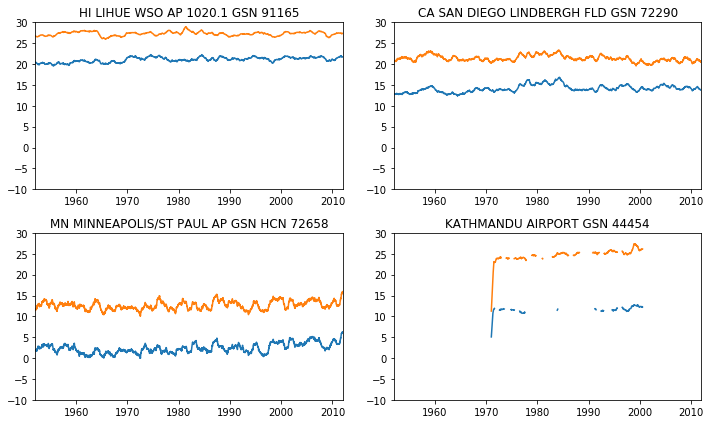

In [204]:
plt.figure(figsize=(10,6))

for i,code in enumerate(dataStations, start=1):
    plt.subplot(2,2,i)
    
    plotSmoothed(getObs('{}.dly'.format(code), 'TMIN'), 365)
    plotSmoothed(getObs('{}.dly'.format(code), 'TMAX'), 365)
    
    plt.title(stations[code])
    plt.axis(xmin=np.datetime64('1952'),xmax=np.datetime64('2012'),ymin=-10,ymax=30)
    
plt.tight_layout()

# Computing Daily Records

## Learning Objectives

* Combining Boolean Masks with logical operators
* Computing max and min across array rows
* Plotting a shaded area with matplotlib

In [205]:
def selectyear(data, year):
    start = np.datetime64('{}'.format(year))
    end = start + np.timedelta64(1,'Y')
    
    return data[(data['date'] >= start) & (data['date'] < end)]['value']

In [206]:
selectyear(kathmandu_tmin, 2000)

array([ 1.9,  2.3,  1.8,  1.5,  1.6,  0.9,  1.2,  1.7,  1.6,  2.6,  3.2,
        2. ,  8. ,  3. ,  0.5, -3. , -0.9,  0.5,  1.3,  2. ,  5.4,  6.4,
        7. ,  4.9,  3. ,  3. ,  1.2,  1. ,  0.5,  1.6,  7.1,  3.6,  5.6,
        4.4,  1. ,  3.2,  6.1,  4.5,  4.5,  1. ,  0.4,  0.6,  6. ,  3.3,
        5.6,  1.6,  4.6,  3.6,  1.5,  0.6,  4. ,  0.2,  1.2,  1.2,  1.8,
        2.5,  4.6,  1.7,  3.3,  5.5,  8.4,  4.2,  7. ,  4.6,  4.8,  5.3,
        5.7,  7.4,  4.6,  4.5,  5.8,  6.2,  8.5,  8.3,  6.7,  6.7,  6.4,
        6.1,  6.4,  7.2,  6.6,  6.7, 10.7,  5. ,  5.3,  7.5, 10.2,  5.3,
        8. ,  9.6, 10.7, 12.7, 11.6, 11.3, 10.7,  9.6,  9.4,  9.8,  9.2,
       10.4,  8.7, 10. , 11. , 12.3, 13.3, 12.6, 13.5, 12. , 11.2, 13.4,
       13. , 14. , 12.1, 13.5, 13.4, 13.4, 13.6, 15. , 15. , 13.5, 12.6,
       15. , 13. , 15. , 17.7, 17. , 17.3, 15. , 13.1, 15.6, 16. , 16.5,
       19.4, 19. , 15. , 16.5, 17.8, 17.4, 19.9, 17.1, 17.7, 18.3, 17.8,
       18. , 18.5, 19.7, 20.1, 18.4, 17.7, 18.5, 16

In [233]:
kathmandu_tmin_all = np.vstack([selectyear(kathmandu_tmin, year)[:365] for year in range(1972, 2018+1)])

ValueError: all the input array dimensions except for the concatenation axis must match exactly

# Challenge

* Find the year with the highest mean TMAX in Minneapolis
* Find the year with the lowest mean TMIN in San Diego
* In the same plot, show TMIN and TMAX throughout those years for those cities

In [210]:
minneapolis_tmax = getObs('USW00014922.dly','TMAX')
minneapolis_tmin = getObs('USW00014922.dly','TMIN')

In [211]:
sandiego_tmax = getObs('USW00023188.dly', 'TMAX')
sandiego_tmin = getObs('USW00023188.dly', 'TMIN')

In [212]:
fillnans(minneapolis_tmax)
fillnans(minneapolis_tmin)
fillnans(sandiego_tmax)
fillnans(sandiego_tmin)

In [213]:
years = np.arange(1940, 2014+1)

In [214]:
minneapolis_tmax_all = np.vstack([selectyear(minneapolis_tmax, year)[:365] for year in years])

In [216]:
minneapolis_tmax_all

array([[-13.9, -12.8, -12.2, ...,   1.1,   1.7,   1.1],
       [  1.7,   0.6,  -8.3, ...,  -5.6,  -2.2,  -8.9],
       [ -8.9, -14.4, -15. , ...,  -6.1,  -6.7,  -2.2],
       ...,
       [  1.1,  -6.7,  -1.7, ...,  -3.3,  -7.2,  -3.9],
       [ -6.7,  -6.1,  -5.6, ...,  -6.6, -16.6, -18.2],
       [-17.1, -15.5,  -1.6, ..., -12.1, -15.5, -10.5]])

In [219]:
minneapolis_mean = np.mean(minneapolis_tmax_all, axis=1)
minneapolis_mean

array([11.83917808, 13.82547945, 12.75561644, 11.87452055, 13.12520548,
       11.6430137 , 13.43260274, 12.54328767, 13.36410959, 13.54219178,
       10.8569863 , 10.44876712, 12.80109589, 13.64356164, 12.78493151,
       12.96191781, 12.65589041, 12.49863014, 13.10438356, 12.94986301,
       12.18849315, 12.48767123, 11.22136986, 12.85616438, 13.30027397,
       11.0890411 , 11.89205479, 11.47780822, 12.64821918, 12.27178082,
       12.07945205, 12.01835616, 10.28465753, 13.11643836, 12.26849315,
       12.26465753, 13.88438356, 12.65945205, 12.21123288, 11.47726027,
       12.87780822, 13.33589041, 12.05726027, 12.1709589 , 12.2860274 ,
       11.75835616, 12.51917808, 15.14986301, 13.84164384, 12.12493151,
       14.04356164, 12.83013699, 12.28273973, 11.29589041, 12.78767123,
       12.55753425, 11.15534247, 12.08328767, 14.54383562, 14.02438356,
       12.90739726, 13.54109589, 12.88109589, 12.93671233, 12.8539726 ,
       13.77972603, 14.43068493, 13.70465753, 12.10739726, 12.33

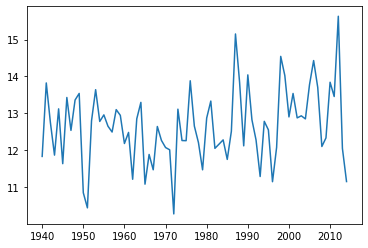

In [218]:
plt.plot(years, minneapolis_mean)

In [220]:
minneapolis_warmest = years[np.argmax(minneapolis_mean)]
minneapolis_warmest

2012

In [221]:
sandiego_tmin_all = np.vstack([selectyear(sandiego_tmin, year)[:365] for year in years])

In [223]:
sandiego_tmin_all

array([[13.9, 12.8, 14.4, ..., 10. , 12.2, 11.7],
       [ 9.4,  8.3,  7.2, ..., 11.7,  9.4,  9.4],
       [ 5.6,  2.2,  4.4, ...,  9.4,  7.8,  7.2],
       ...,
       [ 8.3,  8.3, 10. , ...,  7.2,  8.9,  7.8],
       [ 7.8,  5.6,  6.1, ...,  8.3,  8.9,  8.3],
       [ 8.3,  8.3,  7.8, ...,  8.9, 11.7,  6.1]])

In [225]:
sandiego_mean = np.mean(sandiego_tmin_all, axis=1)
sandiego_mean

array([13.36575342, 13.33753425, 12.46356164, 12.86931507, 12.05726027,
       12.68109589, 12.81534247, 12.64493151, 11.66082192, 12.16657534,
       12.72684932, 12.90739726, 12.76410959, 12.87671233, 13.33068493,
       12.90712329, 13.02246575, 14.01452055, 14.33506849, 14.75068493,
       13.25671233, 13.30767123, 12.72273973, 13.15342466, 12.54630137,
       12.93726027, 13.53287671, 13.4709589 , 13.96246575, 14.03945205,
       14.17616438, 13.37232877, 13.92493151, 13.83589041, 13.95452055,
       13.20986301, 15.01342466, 15.11479452, 15.6539726 , 15.02931507,
       15.29945205, 16.17452055, 14.92410959, 16.23315068, 16.39178082,
       14.59561644, 14.14      , 13.8109589 , 13.87808219, 13.80273973,
       13.98465753, 13.5169863 , 14.8830137 , 14.23671233, 13.69643836,
       14.31835616, 14.83890411, 15.1230137 , 14.13123288, 13.40273973,
       14.43808219, 13.93890411, 13.73917808, 14.53835616, 15.09013699,
       14.73643836, 14.76273973, 13.99506849, 14.16246575, 14.42

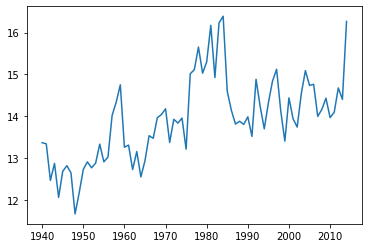

In [226]:
plt.plot(years, sandiego_mean)

In [227]:
sandiego_coolest = years[np.argmin(sandiego_mean)]
sandiego_coolest

1948

(-17.25, 366, -27.04, 42.04)

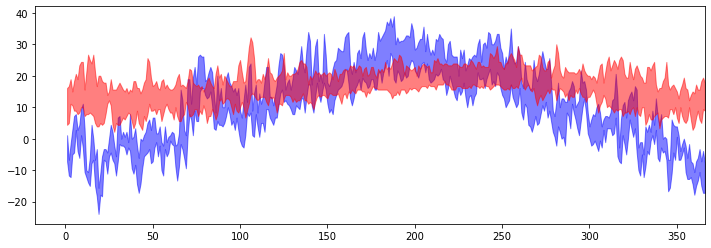

In [241]:
plt.figure(figsize=(12,4))

days = np.arange(1, 366+1)

plt.fill_between(days,
               selectyear(minneapolis_tmin, minneapolis_warmest),
               selectyear(minneapolis_tmax, minneapolis_warmest),
               color='b', alpha=0.5)

plt.fill_between(days,
               selectyear(sandiego_tmin, sandiego_coolest),
               selectyear(sandiego_tmax, sandiego_coolest),
               color='r', alpha=0.5)


plt.axis(xmax=366)